# Training a Convnet From Scratch on a Small Dataset

We are going to use Dogs vs. Cats dataset that was made available by Kaggle as part of a computer-vision competition in late 2013: www.kaggle.com/c/dogs-vs-cats/data

In [1]:
!ls kaggle_cats_dogs

sampleSubmission.csv  test1  test1.zip	train  train.zip


In [2]:
# Copying images to trainig, validation, and test directories 
# Training set: 1,000 samples of each class
# Validation set: 500 samples of each class
# Test set: 500 samples of each class

import os, shutil

# path to the directory where the original dataset was uncompressed
original_dataset_dir = 'kaggle_cats_dogs'

# directory where we will store our smaller dataset
base_dir = 'cats_and_dogs_small'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
    
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
    
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')    # directory with training cat pictures
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')    # directory with training dog pictures
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')    # directory with validation cat pictures
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')    # directory with validation dog pictures
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')    # directory with test cat pictures
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')    # directory with test dog pictures
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

# copy the first 1,000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]      
for fname in fnames:                         
    src = os.path.join(original_dataset_dir, 'train', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# copy the next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# copy the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train', fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# copy the first 1,000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# copy the next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train', fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# copy the next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,'train', fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
# Check how many pictures are in each trainig split (train/validation/test)

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


## Instantiating a small convnet for dogs vs. cats classification


In [4]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


Using TensorFlow backend.
/home/shinto/anaconda3/envs/py36tf/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.22) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [6]:
# Compile
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Data preprocessing
1. Read the picture files.
2. Decode the JPEG content to RGB grids of pixels.
3. Convert these into floating-point tensors.
4. Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values)

Keras has a module with image-processing helper tools, located at keras.preprocessing.image. In particular, it contains the class ImageDataGenerator, which lets you quickly set up Python generators that can automatically turn image files on disk into batches of preprocessed tensors. 

### Understanding Python generators  

A Python generator is an object that acts as an iterator: it’s an object you can use with the for ... in operator. Generators are built using the yield operator.

Here is an example of a generator that yields integers:  

    def generator():   
        i=0  
        while True:  
            i += 1  
            yield i  

    for item in generator():  
        print(item)  
        if item > 4:  
            break  
        
It prints this:  
1   
2  
3  
4  
5  

In [7]:
# Using ImageDataGenerator to read image from directories
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                   target_size = (150, 150),
                                                   batch_size=20,         # number of samples
                                                   class_mode='binary')   # Because we use binary_crossentropy loss, we need binary labels

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150, 150),
                                                       batch_size=20,
                                                       class_mode='binary')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('label batch shape:', labels_batch.shape)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
label batch shape: (20,)


 ## Fitting the model using a batch generator
 
To fit the data using the generator, we are going to use *fit_generator* method, equivalent of *fit*. It expects as its first argument a Python generator that will yield batches of inputs and targets indefinitely, like this one does. Because the data is being generated endlessly (that's why we used *break* in the example above), the Keras model needs to know how many samples to draw from the generator before declaring an epoch over. This is the role of the steps_per_epoch argument: after having drawn steps_per_epoch batches from the generator—that is, after having run for steps_per_epoch gradient descent steps—the fitting process will go to the next epoch. In this case, batches are 20 samples, so it will take 100 batches until you see your target of 2,000 samples.

It’s important to note that *validation_data* is allowed to be a data generator, but it could also be a tuple of Numpy arrays. If you pass a generator as validation_data, then this generator is expected to yield batches of validation data endlessly; thus you should also specify the validation_steps argument, which tells the process how many batches to draw from the validation generator for evaluation.


In [8]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 6s - loss: 0.6879 - acc: 0.5340 - val_loss: 0.6686 - val_acc: 0.6190
Epoch 2/30
100/100 [==============================] - 4s - loss: 0.6534 - acc: 0.6245 - val_loss: 0.6301 - val_acc: 0.6270
Epoch 3/30
100/100 [==============================] - 4s - loss: 0.5968 - acc: 0.6780 - val_loss: 0.5951 - val_acc: 0.6690
Epoch 4/30
100/100 [==============================] - 4s - loss: 0.5669 - acc: 0.7095 - val_loss: 0.6074 - val_acc: 0.6630
Epoch 5/30
100/100 [==============================] - 4s - loss: 0.5315 - acc: 0.7300 - val_loss: 0.5665 - val_acc: 0.6980
Epoch 6/30
100/100 [==============================] - 4s - loss: 0.5029 - acc: 0.7610 - val_loss: 0.6127 - val_acc: 0.6740
Epoch 7/30
100/100 [==============================] - 4s - loss: 0.4836 - acc: 0.7655 - val_loss: 0.5524 - val_acc: 0.7120
Epoch 8/30
100/100 [==============================] - 4s - loss: 0.4526 - acc: 0.7870 - val_loss: 0.5504 - val_acc: 0.7380
Epoch 9/30
100/1

In [9]:
# Save the model after training (a good practice)
model.save('cats_and_dogs_small_1.h5')

## Display curves of loss and accuracy during training


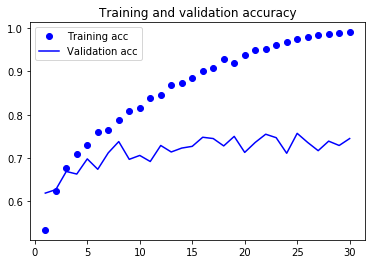

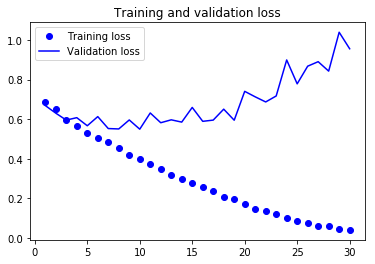

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.legend()

Because we have relatively few training samples (2,000), overfitting will be our number-one concern. We already know about a number of techniques that can help mitigate overfitting, such as dropout and weight decay (L2 regularization). We’re now going to work with a new one, specific to computer vision and used almost universally when processing images with deep-learning models: **data augmentation**.

## Data Augmentation

Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations that yield believable-looking images.  
In Keras, this can be done by configuring a number of random transformations to be performed on the images read by the *ImageDataGenerator* instance.

In [11]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

These are just a few of the options available (for more, see the Keras documentation).
*fill_mode* is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

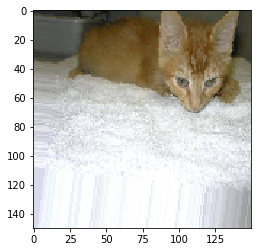

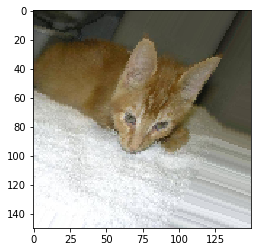

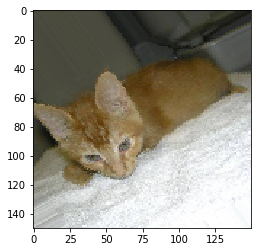

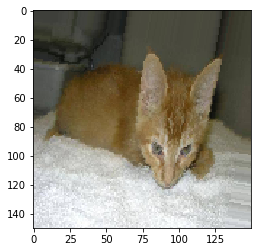

In [12]:
# Displaying some randomly augmented training images
from keras.preprocessing import image     # module with image-preprocessing utilities

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]                                       # chooses one image to augment

img = image.load_img(img_path, target_size=(150, 150))    # reads the image and resizes it

x = image.img_to_array(img)                               # Converts it to a Numpy array with shape (150, 150, 3)

x = x.reshape((1,) + x.shape)                             # Reshapes it to (1, 150, 150, 3)

i = 0
for batch in datagen.flow(x, batch_size=1):               # Generates batches of randomly transformed images. Loops indefinitely, so you need to break the loop at some point!
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

   As the new images are still heavily intercorrelated, this may not be enough to completely get rid of overfitting. To further fight overfitting, you’ll also add a *Dropout* layer to your model, right before the densely connected classifier.
   
## Defining new convnet that includes dropout

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

## Training the model using data-augmentation generators

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)        # Note that the validation data shouldn't be augmented!

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 14s - loss: 0.7014 - acc: 0.5162 - val_loss: 0.6825 - val_acc: 0.4956
Epoch 2/100
100/100 [==============================] - 13s - loss: 0.6665 - acc: 0.5856 - val_loss: 0.6420 - val_acc: 0.6050
Epoch 3/100
100/100 [==============================] - 13s - loss: 0.6411 - acc: 0.6184 - val_loss: 0.6039 - val_acc: 0.6872
Epoch 4/100
100/100 [==============================] - 13s - loss: 0.6156 - acc: 0.6572 - val_loss: 0.5961 - val_acc: 0.6869
Epoch 5/100
100/100 [==============================] - 13s - loss: 0.6132 - acc: 0.6519 - val_loss: 0.5840 - val_acc: 0.6859
Epoch 6/100
100/100 [==============================] - 13s - loss: 0.5994 - acc: 0.6691 - val_loss: 0.5711 - val_acc: 0.6985
Epoch 7/100
100/100 [==============================] - 13s - loss: 0.5908 - acc: 0.6794 - val_loss: 0.5684 - val_acc: 0.6843
Epoch 8/100
100/100 [====================

100/100 [==============================] - 13s - loss: 0.4233 - acc: 0.8072 - val_loss: 0.5186 - val_acc: 0.7462
Epoch 66/100
100/100 [==============================] - 13s - loss: 0.4172 - acc: 0.7997 - val_loss: 0.4626 - val_acc: 0.7803
Epoch 67/100
100/100 [==============================] - 13s - loss: 0.4006 - acc: 0.8169 - val_loss: 0.4677 - val_acc: 0.7900
Epoch 68/100
100/100 [==============================] - 13s - loss: 0.4257 - acc: 0.8122 - val_loss: 0.4414 - val_acc: 0.7964
Epoch 69/100
100/100 [==============================] - 13s - loss: 0.4076 - acc: 0.8081 - val_loss: 0.4845 - val_acc: 0.7798
Epoch 70/100
100/100 [==============================] - 13s - loss: 0.4091 - acc: 0.8247 - val_loss: 0.4472 - val_acc: 0.8028
Epoch 71/100
100/100 [==============================] - 13s - loss: 0.4192 - acc: 0.8078 - val_loss: 0.4652 - val_acc: 0.7893
Epoch 72/100
100/100 [==============================] - 13s - loss: 0.4092 - acc: 0.8178 - val_loss: 0.4604 - val_acc: 0.7900
Epoch

In [15]:
# save the model for later visualizations
model.save('cats_and_dogs_small_2.h5')

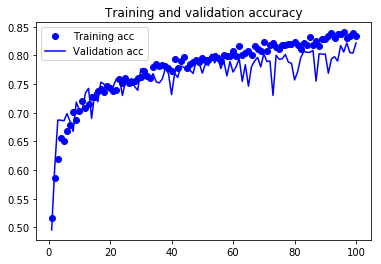

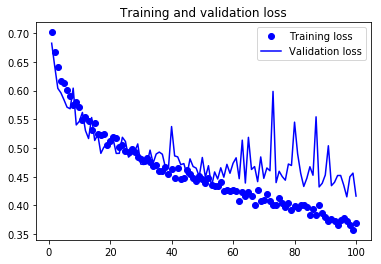

In [16]:
# Accuracy and Loss plots

import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.legend()

Thanks to data augmentation and dropout, we’re no longer overfitting: the training curves are closely tracking the validation curves. We now reach an accuracy of 81%, a 14% relative improvement over the non-regularized model.  

# Using a pretrained convnet

We could have improved our previous model by using regularization techniques even further, and by tuning the network's parameters, but because we have so little data to work with, it may be difficult to go much higher. That's why, as a next step we are going to user a pretrained model.

**Pretrained network** is a saved network that was previously trained on a large dataset, typically on a large_scale imag_classification task. 

In this case, we are going to use a large convnet trained on the ImageNet dataset (1.4 million labeled images and 1,000 different classes). We’ll use the VGG16 architecture, developed by Karen Simonyan and Andrew Zisserman in 2014; it’s a simple and widely used convnet architecture for ImageNet. Although it’s an older model, far from the current state of the art and somewhat heavier than many other recent models, its architecture is similar to what we’re already familiar with and is easy to understand without introducing any new concepts.

There are two ways to use a pretrained network: **feature extraction** and **fine-tuning**.

## Feature extraction

Convnets used for image classification comprise two parts: they start with a series of pooling and convolution layers, and they end with a densely connected classifier. The first part is called the convolutional base of the model. In the case of convnets, feature extraction consists of taking the convolutional base of a previously trained network, running the new data through it, and training a new classifier on top of the output.

Here’s the list of image-classification models (all pretrained on the ImageNet dataset) that are available as part of keras .applications:
* Xception
* Inception V3 
* ResNet50
* VGG16
* VGG19
* MobileNet

In [29]:
# Instantiating the VGG16 convolutional base

from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))

You pass three arguments to the constructor:

* **weights** specifies the weight checkpoint from which to initialize the model.
* **include_top** refers to including (or not) the densely connected classifier on top of the network. By default, this densely connected classifier corresponds to the 1,000 classes from ImageNet. Because you intend to use your own densely connected classifier (with only two classes: cat and dog), you don’t need to include it.
* **input_shape** is the shape of the image tensors that you’ll feed to the network. This argument is purely optional: if you don’t pass it, the network will be able to process inputs of any size.

In [30]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

There are two ways we can proceed:

* Running the convolutional base over your dataset, recording its output to a Numpy array on disk, and then using this data as input to a standalone, densely connected classifier similar to those you saw in part 1 of this book. This solution is fast and cheap to run, because it only requires running the convolutional base once for every input image, and the convolutional base is by far the most expensive part of the pipeline. But for the same reason, this technique won’t allow you to use data augmentation.
* Extending the model you have (conv_base) by adding Dense layers on top, and running the whole thing end to end on the input data. This will allow you to use data augmentation, because every input image goes through the convolutional base every time it’s seen by the model. But for the same reason, this technique is far more expensive than the first.

### Fast Feature Extraction Without Data Augmentation

We are going to run instances of *ImageDataGenerator* to extract images as Numpy arrays as well as their labels. We will extract features from these images by calling the *predict* method of the *conv_base* model. 

In [31]:
# Extracting features using the pretrained convolutional base
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
# flatten the features of shape (sampes, 4, 4, 512) to be (samples, 8192)
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [33]:
# Defining and training densely connected classifier
# training is done on the data and labels that we just recorded.
# We are also using drop-out regulatrization

from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(train_features, train_labels,
                   epochs=30,
                   batch_size=20,
                   validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 0s - loss: 0.5953 - acc: 0.6750 - val_loss: 0.4392 - val_acc: 0.8490
Epoch 2/30
2000/2000 [==============================] - 0s - loss: 0.4341 - acc: 0.7990 - val_loss: 0.3615 - val_acc: 0.8770
Epoch 3/30
2000/2000 [==============================] - 0s - loss: 0.3535 - acc: 0.8480 - val_loss: 0.3236 - val_acc: 0.8870
Epoch 4/30
2000/2000 [==============================] - 0s - loss: 0.3179 - acc: 0.8740 - val_loss: 0.2988 - val_acc: 0.8910
Epoch 5/30
2000/2000 [==============================] - 0s - loss: 0.2907 - acc: 0.8780 - val_loss: 0.2880 - val_acc: 0.8860
Epoch 6/30
2000/2000 [==============================] - 0s - loss: 0.2666 - acc: 0.8965 - val_loss: 0.2758 - val_acc: 0.8900
Epoch 7/30
2000/2000 [==============================] - 0s - loss: 0.2518 - acc: 0.9070 - val_loss: 0.2640 - val_acc: 0.9000
Epoch 8/30
2000/2000 [==============================] - 0s - loss: 0.2380 - a

### Loss and Accuracy curves during training

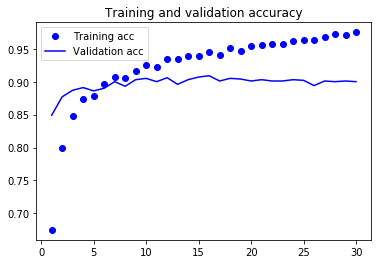

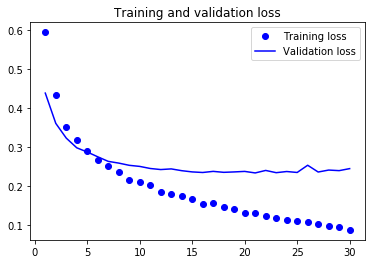

In [34]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

Of course, the validation accuracy is much better than in the previous model. But it overfits due to the small number of images and because with this technique we didn't use data augmentation.

### Feature Extraction with Data Augmentation (much slower and more expensive)

**NOTE** This technique is so expensive that you should only attempt it if you have access to a GPU—it’s absolutely intractable on CPU. If you can’t run your code on GPU, then the previous technique is the way to go.

In [35]:
# Adding a densely connected classifier on top of the convolutional base
# Because models behave just like layers, we can add a model (like conv_base) to a
# Sequential model just like we would add a layer.
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


Befor compiling and training, it is very important to freeze the convolutional base. **Freezing** a layer or set of layers means preventing their weights from being updated during training. If you don’t do this, then the representations that were pre- viously learned by the convolutional base will be modified during training. Because the Dense layers on top are randomly initialized, very large weight updates would be propagated through the network, effectively destroying the representations previously learned.

In [37]:
# freeze a network (set trainable attribute to False)

print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))


This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


Total of four weight tensors: two per layer (the main weight matrix and the bias vector). If you ever modify weight trainability after compilation, you should then recompile the model, or these changes will be ignored.

## Training the model end to end with a frozen convolutional base

In [38]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)    # Note that the validation data shouldn't be augmented

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [39]:
## Only run this cell with gpu

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 17s - loss: 0.4386 - acc: 0.7820 - val_loss: 0.1535 - val_acc: 0.9380
Epoch 2/30
100/100 [==============================] - 17s - loss: 0.2850 - acc: 0.8785 - val_loss: 0.1177 - val_acc: 0.9460
Epoch 3/30
100/100 [==============================] - 17s - loss: 0.2095 - acc: 0.9165 - val_loss: 0.2255 - val_acc: 0.9160
Epoch 4/30
100/100 [==============================] - 17s - loss: 0.1838 - acc: 0.9255 - val_loss: 0.1121 - val_acc: 0.9570
Epoch 5/30
100/100 [==============================] - 17s - loss: 0.1437 - acc: 0.9425 - val_loss: 0.1307 - val_acc: 0.9480
Epoch 6/30
100/100 [==============================] - 17s - loss: 0.1447 - acc: 0.9390 - val_loss: 0.0898 - val_acc: 0.9660
Epoch 7/30
100/100 [==============================] - 17s - loss: 0.1243 - acc: 0.9530 - val_loss: 0.1308 - val_acc: 0.9510
Epoch 8/30
100/100 [==============================] - 17s - loss: 0.1097 - acc: 0.9550 - val_loss: 0.0861 - val_acc: 0.9640
Epoch 9/

### Loss and Accuracy curves during training

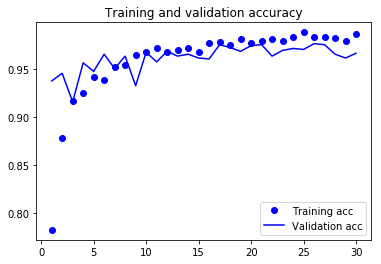

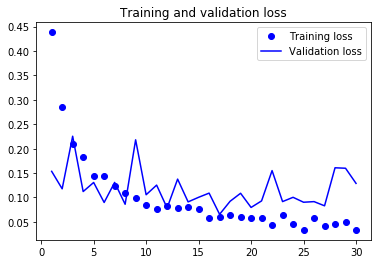

In [41]:
#import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

# Fine-tuning

Fine-tuning consists of unfreezing a few of the top layers of a frozen model base used for feature extraction, and jointly training both the newly added part of the model (in this case, the fully connected classifier) and these top layers.  

This is called fine-tuning because it slightly adjusts the more abstract representations of the model being reused, in order to make them more rele- vant for the problem at hand.  

Steps for fine-tuning:
1. Add your custom network on top of an already-trained base network.
2. Freeze the base network.
3. Train the part you added.
4. Unfreeze some layers in the base network.
5. Jointly train both these layers and the part you added.

Befor unfreezing some layers of base, we train our added part. The reason for that is the following: If the classifier isn’t already trained, then the error signal propagating through the network during training will be too large, and the represen- tations previously learned by the layers being fine-tuned will be destroyed.

We have already done the first three steps. We will proceed with step 4: unfreeze *conv_base* and then freeze individual layers inside it.

In [42]:
# Remember the architect of conv_base
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

There are 5 blocks in our conv_base model. You can see it above. We are going to freeze the base up to *block4_pool*, and the layers *block5_conv1*, *block5_conv2*, and *block5_conv3* should be trainable.  

In [43]:
# Freezing all layers up to a specific one
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

We are going to start fine-tuning with RMSProp optimizer, and a very low learning rate. We are using low learning rate as we want to limit the magnitude of the modifications we make to the representations of the three layers we are fine-tuning. Updates that are too large may harm these representations.

In [44]:
# compile and fine-tune the model

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-5),
             metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 9s - loss: 0.0161 - acc: 0.9950 - val_loss: 0.1014 - val_acc: 0.9740
Epoch 2/100
100/100 [==============================] - 8s - loss: 0.0143 - acc: 0.9940 - val_loss: 0.1002 - val_acc: 0.9770
Epoch 3/100
100/100 [==============================] - 8s - loss: 0.0069 - acc: 0.9980 - val_loss: 0.0799 - val_acc: 0.9810
Epoch 4/100
100/100 [==============================] - 8s - loss: 0.0133 - acc: 0.9965 - val_loss: 0.1250 - val_acc: 0.9750
Epoch 5/100
100/100 [==============================] - 8s - loss: 0.0130 - acc: 0.9955 - val_loss: 0.0986 - val_acc: 0.9740
Epoch 6/100
100/100 [==============================] - 8s - loss: 0.0079 - acc: 0.9955 - val_loss: 0.0960 - val_acc: 0.9790
Epoch 7/100
100/100 [==============================] - 8s - loss: 0.0108 - acc: 0.9960 - val_loss: 0.0706 - val_acc: 0.9810
Epoch 8/100
100/100 [==============================] - 8s - loss: 0.0104 - acc: 0.9955 - val_loss: 0.1265 - val_acc: 0.9740
Epoch 9/

100/100 [==============================] - 8s - loss: 0.0032 - acc: 0.9980 - val_loss: 0.1673 - val_acc: 0.9690
Epoch 67/100
100/100 [==============================] - 9s - loss: 0.0096 - acc: 0.9980 - val_loss: 0.1370 - val_acc: 0.9740
Epoch 68/100
100/100 [==============================] - 8s - loss: 0.0025 - acc: 0.9985 - val_loss: 0.1381 - val_acc: 0.9740
Epoch 69/100
100/100 [==============================] - 9s - loss: 0.0035 - acc: 0.9985 - val_loss: 0.1520 - val_acc: 0.9720
Epoch 70/100
100/100 [==============================] - 8s - loss: 0.0060 - acc: 0.9985 - val_loss: 0.1469 - val_acc: 0.9740
Epoch 71/100
100/100 [==============================] - 8s - loss: 0.0018 - acc: 0.9990 - val_loss: 0.1267 - val_acc: 0.9820
Epoch 72/100
100/100 [==============================] - 8s - loss: 5.4803e-04 - acc: 1.0000 - val_loss: 0.1414 - val_acc: 0.9780
Epoch 73/100
100/100 [==============================] - 8s - loss: 0.0043 - acc: 0.9985 - val_loss: 0.1466 - val_acc: 0.9760
Epoch 74/

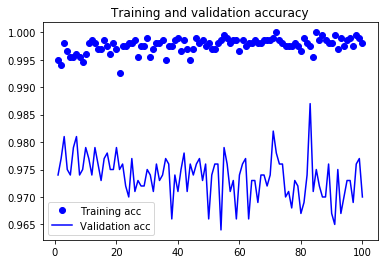

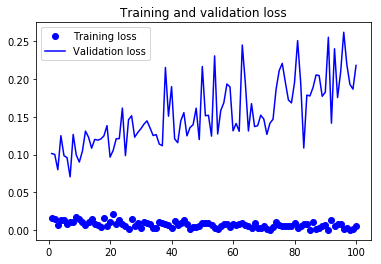

In [45]:
## Plot the results

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In order to reduce the noise in the curves, we can smooth them by replacing every loss and accuracy with exponential moving averages of these quantities.

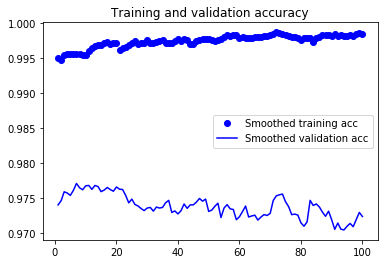

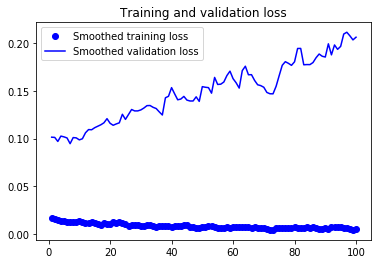

In [46]:
# Smoothing the plots
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

Even though the loss is not decreasing, the accuracy increased from 96% to 97%. That's because what matters for accuracy is the distribution of the loss values, not their average. The loss is an average of pointwise loss values, while accuracy is the result of a binary thresholding of the class probability predicted by the model. **The model may still be improving even if this isn’t reflected in the average loss**.


## Evaluate this model on the test data

In [47]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.965999994278


# Wrapping up

* Convnets are the best type of machine-learning models for computer-vision tasks. It’s possible to train one from scratch even on a very small dataset, with decent results.
* On a small dataset, overfitting will be the main issue. Data augmentation is a powerful way to fight overfitting when you’re working with image data.
* It’s easy to reuse an existing convnet on a new dataset via feature extraction. This is a valuable technique for working with small image datasets.
* As a complement to feature extraction, you can use fine-tuning, which adapts to a new problem some of the representations previously learned by an existing model. This pushes performance a bit further.

# Visualizing What Convnets Learn


Three of the most accessible and useful ones:
* **Visualizing intermediate convnet outputs** (intermediate activations) —Useful for understanding how successive convnet layers transform their input, and for getting a first idea of the meaning of individual convnet filters.
* **Visualizing convnets filters**—Useful for understanding precisely what visual pattern or concept each filter in a convnet is receptive to.
* **Visualizing heatmaps of class activation** in an image—Useful for understanding which parts of an image were identified as belonging to a given class, thus allowing you to localize objects in images.

## Visualizing intermediate activations

We want to visualize feature maps with three dimensions: width, height, and depth (channels). Each channel encodes relatively independent features, so the proper way to visualize these feature maps is by independently plot- ting the contents of every channel as a 2D image.

In [69]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36992)             0         
__________

In [70]:
# Preprocessing a single image (not part of the images the network was trained on)
img_path = 'cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image                  # Preprocessing the image into a 4D tensor
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.                                     # Remember that the model was traied on inputs that were preprocessed this way

print(img_tensor.shape)

(1, 150, 150, 3)


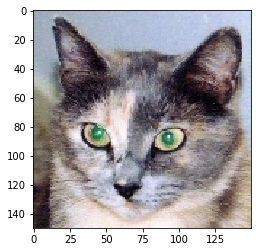

In [71]:
# Display the test picture
import matplotlib.pyplot as plt
% matplotlib inline

plt.imshow(img_tensor[0])

In order to extract the feature maps we want to look at, we’ll create a Keras model that takes batches of images as input, and outputs the activations of all convolution and pooling layers. To do this, we’ll use the Keras class **Model**. A model is instantiated using two arguments: an input tensor (or list of input tensors) and an output tensor (or list of output tensors). The resulting class is a Keras model, just like the Sequential models we’re familiar with, mapping the specified inputs to the specified outputs. **What sets the Model class apart is that it allows for models with multiple outputs, unlike Sequential.**

In [72]:
# Instantiating a model from an input tensor and a list of output tensors
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]    # Extracts the outputs of the top eight layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)    # Creates a model that will return these outputs, given the model input



When fed an image input, this model returns the values of the layer activations in the original model. This model has one input and eight outputs: onw output per layer activation.

In [73]:
# Running the model in predict mode
activations = activation_model.predict(img_tensor)          # Returns a list of five Numpy arrays: one array per layer activation


For instance, this is the activation of the first convolution layer for the cat image input

In [74]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


It’s a 148 × 148 feature map with 32 channels. Let’s try plotting the fourth channel of the activation of the first layer of the original model.

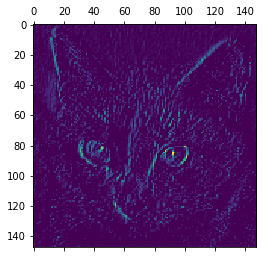

In [75]:
# Visualizing the fourth channel
import matplotlib.pyplot as plt
% matplotlib inline

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')


This channel appears to encode a diagonal edge detector. Let’s try the seventh chan- nel

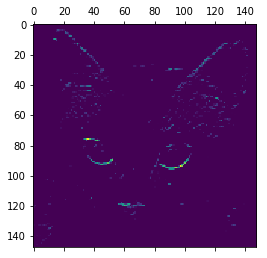

In [76]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

At this point, let’s plot a complete visualization of all the activations in the network. We'll extract and plot every channel in each of the eight activation maps, and we'll stack the results in one big image tensor, with channels stacked side by side.

/home/shinto/anaconda3/envs/py36tf/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


MemoryError: 

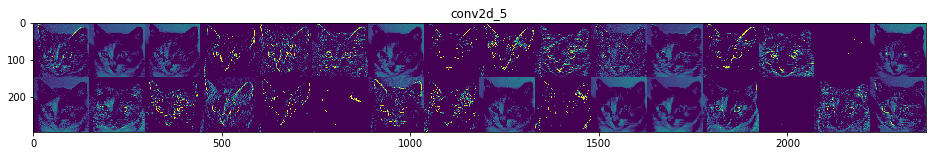

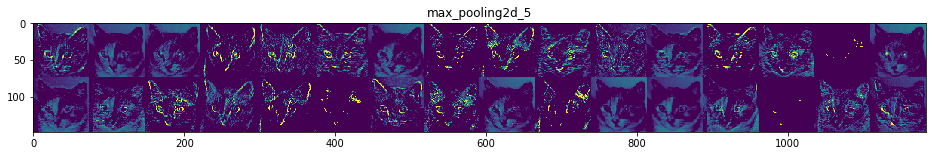

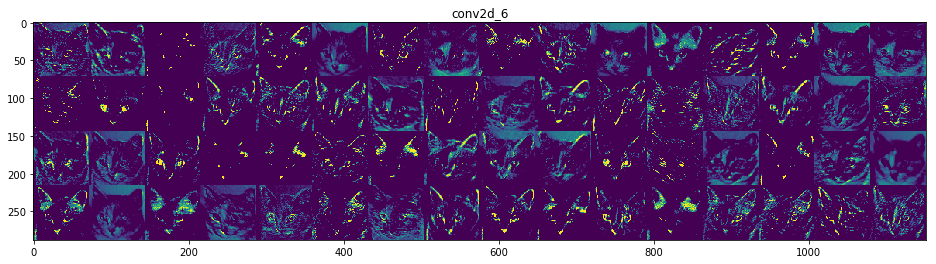

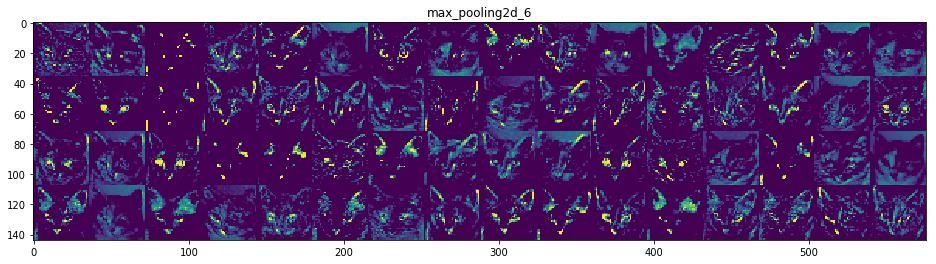

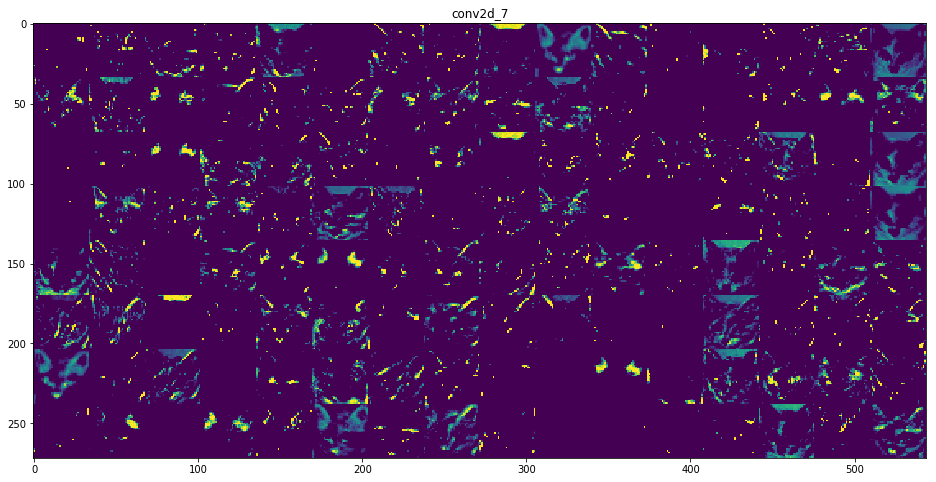

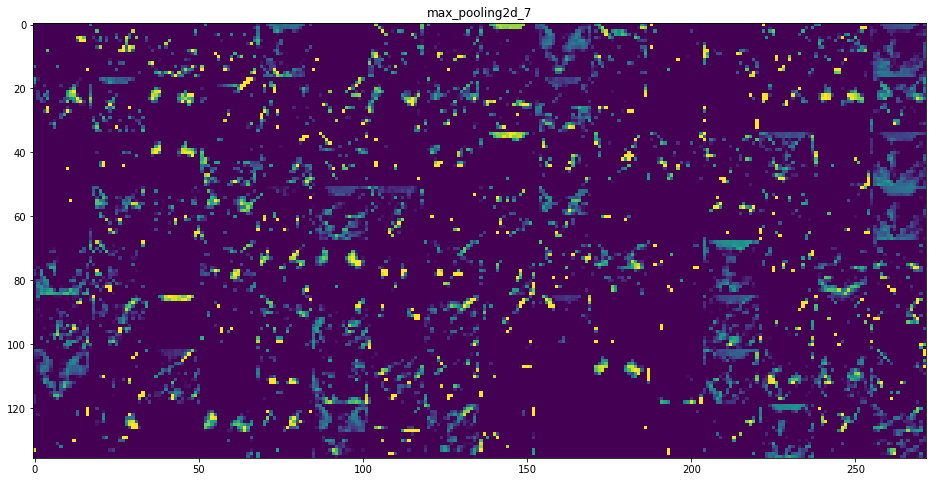

In [77]:
# names of the layers, so we can have them as part of out plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16

# displays the feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]       # Number of features in the feature map
    size = layer_activation.shape[1]              # The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row         # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):                                          # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()                      # Post-processes the feature to make it cisually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,               
                        row * size: (row + 1) * size] = channel_image   # Displays the grid
    
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                       scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

There are a few things to note here:
* The first layer acts as a collection of various edge detectors. At that stage, the activations retain almost all of the information present in the initial picture.
* As you go higher, the activations become increasingly abstract and less visually interpretable. They begin to encode higher-level concepts such as “cat ear” and “cat eye.” Higher presentations carry increasingly less information about the visual contents of the image, and increasingly more information related to the class of the image.
* The sparsity of the activations increases with the depth of the layer: in the first layer, all filters are activated by the input image; but in the following layers, more and more filters are blank. This means the pattern encoded by the filter isn’t found in the input image.

A deep neural network effectively acts as an information distillation pipeline, with raw data going in (in this case, RGB pictures) and being repeatedly transformed so that irrelevant infor- mation is filtered out (for example, the specific visual appearance of the image), and useful information is magnified and refined (for example, the class of the image).

## Visualizing convnet Filters

Another easy way to inspect the filters learned by convnets is to display the visual pat- tern that each filter is meant to respond to. This can be done with gradient ascent in input space: applying gradient descent to the value of the input image of a convnet so as to maximize the response of a specific filter, starting from a blank input image. The resulting input image will be one that the chosen filter is maximally responsive to.  

The process is simple: you’ll build a loss function that maximizes the value of a given filter in a given convolution layer, and then you’ll use stochastic gradient descent to adjust the values of the input image so as to maximize this activation value. For instance, here’s a loss for the activation of filter 0 in the layer block3_conv1 of the VGG16 network, pretrained on ImageNet.


In [78]:
# Defining the loss tensor for filter visualization
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',
             include_top=False)
layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

To implement gradient descent, we’ll need the gradient of this loss with respect to the model’s input. To do this, we’ll use the ***gradients*** function packaged with the ***backend*** module of Keras.

In [79]:
# Obtaining the gradient of the loss with regard to the input

grads = K.gradients(loss, model.input)[0]        # The call to gradients returns a list of tensors 
                                                 # (of size 1 in this case). Hence, we keep only the 
                                                 # first element - which is a tensor.

A non-obvious trick to use to help the gradient-descent process go smoothly is to nor- malize the gradient tensor by dividing it by its L2 norm (the square root of the average of the square of the values in the tensor). This ensures that the magnitude of the updates done to the input image is always within the same range.

In [80]:
# Grandient-normalizaion trick
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)       # Add 1e-5 before dividing to avoid accidentally dividing by 0

Now we need a way to compute the value of the loss tensor and the gradient tensor, given an input image. We can define a Keras backend function to do this: ***iterate*** is a function that takes a Numpy tensor (as a list of tensors of size 1) and returns a list of two Numpy tensors: the loss value and the gradient value.

In [82]:
# Fetching Numpy output values given Numpy input values
iterate = K.function([model.input], [loss, grads])

import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [83]:
# Loss maixmization via stochastic gradient decent
input_img_data = np.random.random((1, 150, 150, 3)) *20 + 128.   # Starts from a gray image with some noise

step = 1.                                                  # Magnitude of each gradient update
for i in range(40):                                        # Runs gradient ascent for 40 steps
    loss_value, grads_value = iterate([input_img_data])    # Computes the loss value and gradient value
    input_img_data += grads_value * step                   # Adjusts the input image in the direction that maximizes the loss
    


The resulting image tensor is a floating-point tensor of shape (1, 150, 150, 3), with values that may not be integers within [0, 255]. Hence, we need to postprocess this tensor to turn it into a displayable image. We do so with the following straightforward utility function.

In [84]:
# Utility function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize the tensor: center on 0, ensure that std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    # Clip to [0,1]
    x += 0.5
    x = np.clip(x, 0, 1)
    
    # convert to an RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    
    return x

Now we have all the pieces. Let’s put them together into a Python function that takes as input a layer name and a filter index, and returns a valid image tensor representing the pattern that maximizes the activation of the specified filter.

In [85]:
# Function to generate filter visualizations
def generate_pattern(layer_name, filter_index, size=150):
    # Buil a loss function that maximizes the activation of the nth filter of the layer under consideration
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    grads = K.gradients(loss, model.input)[0]           # Computes the gradient of the input picture with regard to this loss
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)   # Normalization trick: normalizes the gradient
    iterate = K.function([model.input], [loss, grads])  # Returns the loss and grads given the input picture
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.     # Starts from a gray image with some noise
    
    # Run gradient ascent for 40 steps
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    
    img = input_img_data[0]
    return deprocess_image(img)

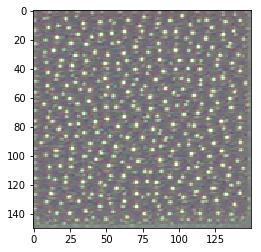

In [86]:
# Pattern that the zeroth channel in layer block3_conv1 responds to maximally
plt.imshow(generate_pattern('block3_conv1', 0))

It seems that filter 0 in layer block3_conv1 is responsive to a polka-dot pattern. Now the fun part: we can start visualizing every filter in every layer. For simplicity, we’ll only look at the first 64 filters in each layer, and we’ll only look at the first layer of each convolution block (block1_conv1, block2_conv1, block3_conv1, block4_ conv1, block5_conv1). We’ll arrange the outputs on an 8 × 8 grid of 64 × 64 filter patterns, with some black margins between each filter pattern

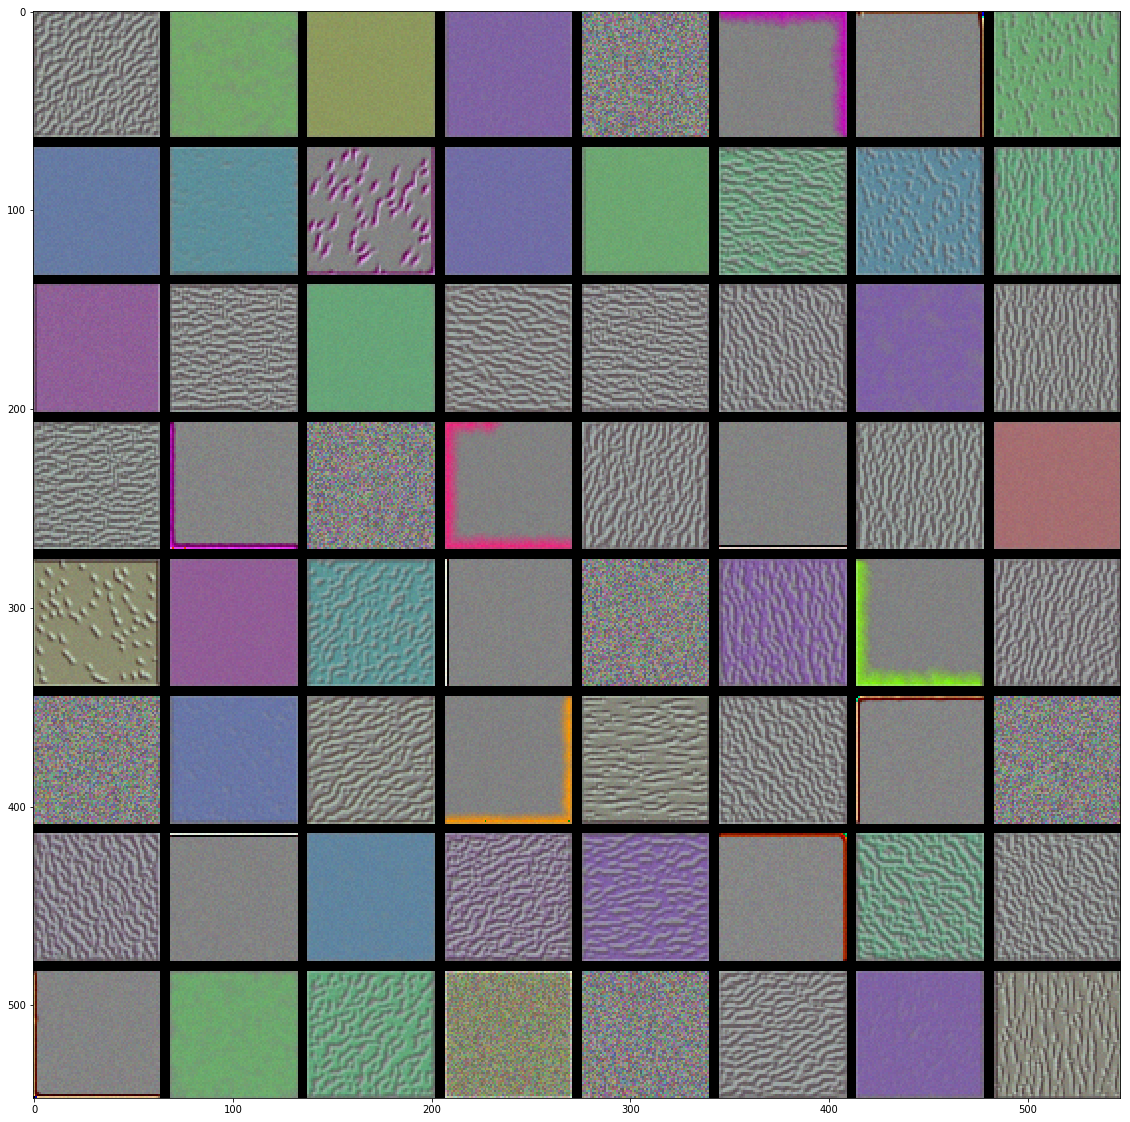

In [88]:
# generating a grid of all filter response patterns in a layer
layer_name = 'block1_conv1'
size = 64
margin = 5

results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))     # Empty(black) image to store results

for i in range(8):                     # Iterate over the rows of the results grid
    for j in range(8):                 # Iterate over the columns of the results grid
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)           # Generate the pattern for filter i+(j*8) in payer_name
        
        # Put the result in the square (i,j) of the results grid
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end,
                vertical_start: vertical_end, :] = filter_img
        
plt.figure(figsize=(20, 20))
plt.imshow(results)

These filter visualizations tell us a lot about how convnet layers see the world: each layer in a convnet learns a collection of filters such that their inputs can be expressed as a combination of the filters. This is similar to how the Fourier transform decomposes signals onto a bank of cosine functions. The filters in these convnet filter banks get increasingly complex and refined as we go higher in the model:

* The filters from the first layer in the model (block1_conv1) encode simple directional edges and colors (or colored edges, in some cases).
* The filters from block2_conv1 encode simple textures made from combinations of edges and colors.
* The filters in higher layers begin to resemble textures found in natural images: feathers, eyes, leaves, and so on.

## Visualizing heatmaps of class activation
**class activation map (CAM)**


This visualization technique is useful for understanding which parts of a given image led a convnet to its final classification decision. This is helpful for debugging the decision process of a convnet, particularly in the case of a classification mistake. It also allows us to locate specific objects in an image.

It consists of producing heatmaps of class activation over input images. A class activation heatmap is a 2D grid of scores associated with a specific output class, computed for every location in any input image, indicating how important each location is with respect to the class under consideration. 

The specific implementation we’ll use is the one described in “Grad-CAM: Visual Explanations from Deep Networks via Gradient-based Localization.” It’s very simple: it consists of taking the output feature map of a convolution layer, given an input image, and weighing every channel in that feature map by the gradient of the class with respect to the channel. Intuitively, one way to understand this trick is that we’re weighting a spatial map of “how intensely the input image activates different channels” by “how important each channel is with regard to the class,” resulting in a spatial map of “how intensely the input image activates the class.”

In [89]:
# Loading the VGG15 network with pretrained weights
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')        # Note that we include the densely connected classifier on top; 
                                         # in all previous cases, you discarded it.


The model was trained on images of size 224 × 244, preprocessed according to a few rules that are packaged in the utility function *keras.applications.vgg16.preprocess_input*. So we need to load the image, resize it to 224 × 224, convert it to a Numpy float32 tensor, and apply these preprocessing rules.

In [90]:
# Preprocessing an input image for VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

img_path = 'creative_commons_elephant.jpg'                  
img = image.load_img(img_path, target_size=(224, 224))  # Python Imaging Library (IPL) image of size 224 X 224
x = image.img_to_array(img)                             # float23 Numpy array of shape (224, 224, 3)
x = np.expand_dims(x, axis=0)                           # Adds a dimension to transform the array into a batch of size (1, 224, 224, 3)
x = preprocess_input(x)                                 # preprocesses the batch(this does channel-wise color normalization)


You can now run the pretrained network on the image and decode its prediction vec- tor back to a human-readable format:

In [91]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02504458', 'African_elephant', 0.90942162), ('n01871265', 'tusker', 0.086182274), ('n02504013', 'Indian_elephant', 0.0043545687)]


The top three classes predicted for this image are as follows:
* African elephant (with 92.5% probability) 
* Tusker (with 7% probability)
* Indian elephant (with 0.4% probability)

The network has recognized the image as containing an undetermined quantity of African elephants. The entry in the prediction vector that was maximally activated is the one corresponding to the “African elephant” class, at index 386:


In [92]:
np.argmax(preds[0])

386

In [94]:
# Setting up the Grad_CAM algorithm 
# (to help visualize which parts of the image are the most African elephant-like)
african_elephant_output = model.output[:, 386]          # "African elephant" entry in the prediction vector
last_conv_layer = model.get_layer('block5_conv3')         # Output feature map of the block5_conv3 layer, 
                                                          # the last convolutional layer in VGG16
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]    # Gradient of the "African elephant" class               
                                                                           # with regard to the output feature map of block5_conv3
pooled_grads = K.mean(grads, axis=(0, 1, 2))              # Vector of shape (512,), where each entry is the mean intensity 
                                                          # of the gradient over a specific feature-map channel
iterate = K.function([model.input],
                     [pooled_grads, last_conv_layer.output[0]])   # Lets you access the values of the quantities you 
                                                                  # just defined: pooled_grads and the output feature 
                                                                  # map of block5_conv3, given a sample image

pooled_grads_value, conv_layer_output_value = iterate([x])        # Values of these two quantities, as Numpy arrays, 
                                                                  # given the sample image of two elephants


for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]     # Multiplies each channel in the feature-map
                                                                  # array by “how important this channel is” with regard
                                                                  # to the “elephant” class
            
heatmap = np.mean(conv_layer_output_value, axis=-1)               # The channel-wise mean of the resulting feature map
                                                                  # is the heatmap of the class activation.

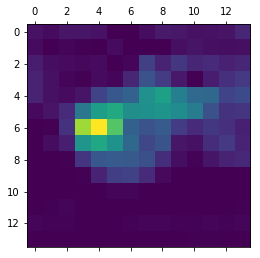

In [95]:
# Heatmap post-processing
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [96]:
# Superimposing the heatmap with the original picture

import cv2          
img = cv2.imread(img_path)                                     # Uses cv2 to load the original image

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))    # Resizes the heatmap to be the same size as the

heatmap = np.uint8(255 * heatmap)                              # Converts the heatmap to RGB

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)         # Applies the heatmap to the original image

superimposed_img = heatmap * 0.4 + img                         # 0.4 here is a heatmap intensity factor.
 
cv2.imwrite('elephant_cam.jpg', superimposed_img)              # Save the image to disk

True

This visualization technique answers two important questions:

* Why did the network think this image contained an African elephant?
* Where is the African elephant located in the picture?

In particular, it’s interesting to note that the ears of the elephant calf are strongly activated: this is probably how the network can tell the difference between African and Indian elephants.

# Summary

* Convnets are the best tool for attacking visual-classification problems.
* Convnets work by learning a hierarchy of modular patterns and concepts to represent the visual world.
* The representations they learn are easy to inspect—convnets are the opposite of black boxes!
* You’re now capable of training your own convnet from scratch to solve an image-classification problem.
* You understand how to use visual data augmentation to fight overfitting.
* You know how to use a pretrained convnet to do feature extraction and fine-tuning.
* You can generate visualizations of the filters learned by your convnets, as well as heatmaps of class activity.